# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

### Problem 1: Response
Data represents 17 marketing campaigns, for a total of 79354 contacts.

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [782]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import time

from sklearn.linear_model import LogisticRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import auc, RocCurveDisplay, precision_score, recall_score, accuracy_score, roc_auc_score, f1_score, ConfusionMatrixDisplay, roc_curve, RocCurveDisplay
from sklearn.compose import make_column_transformer
from sklearn.dummy import DummyClassifier
from sklearn.feature_selection import SequentialFeatureSelector



In [744]:
full_data = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [745]:
full_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [746]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

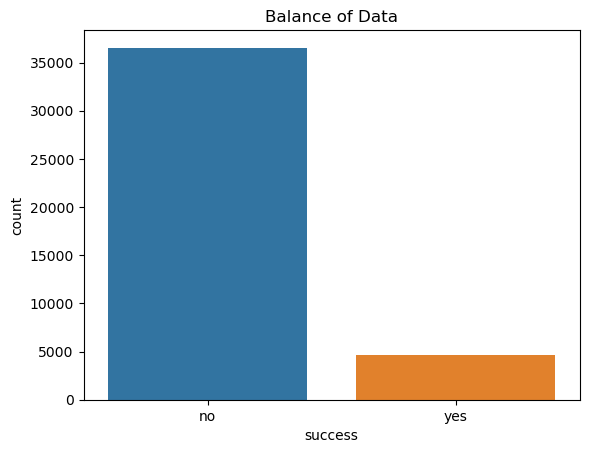

In [747]:
#data is highly unbalanced
ax = sns.countplot(data = df, x='y')
ax.set(xlabel='success', ylabel='count')
ax.set_title('Balance of Data')
plt.savefig('images/data_balance.png', bbox_inches = "tight")

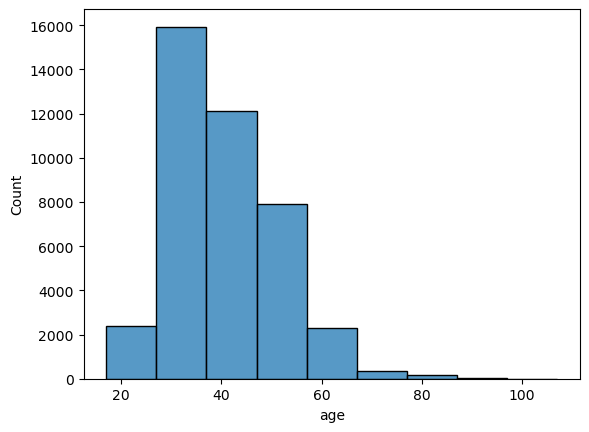

In [748]:
#age distribution
sns.histplot(data=df, x='age', binwidth=10)
ax.set_title('Age Distribution')
plt.savefig('images/age_dist.png', bbox_inches = "tight")

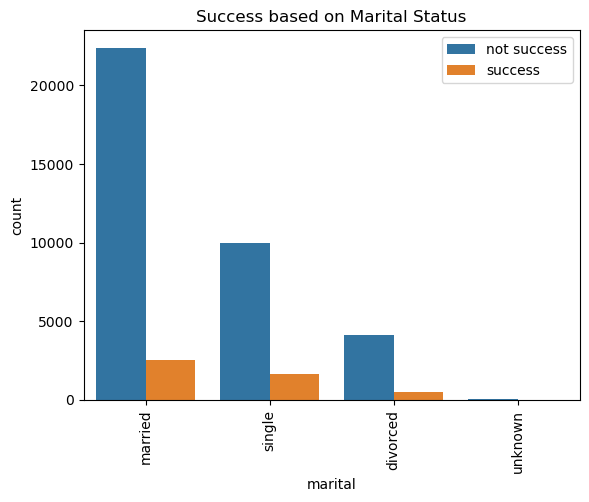

In [749]:
#Marital status on campaign success
ax = sns.countplot(data=df, x='marital', hue='y')
ax.set_title('Success based on Marital Status')
plt.legend(labels=['not success', 'success'])
plt.xticks(rotation=90)
plt.savefig('images/success_marital.png', bbox_inches = "tight")

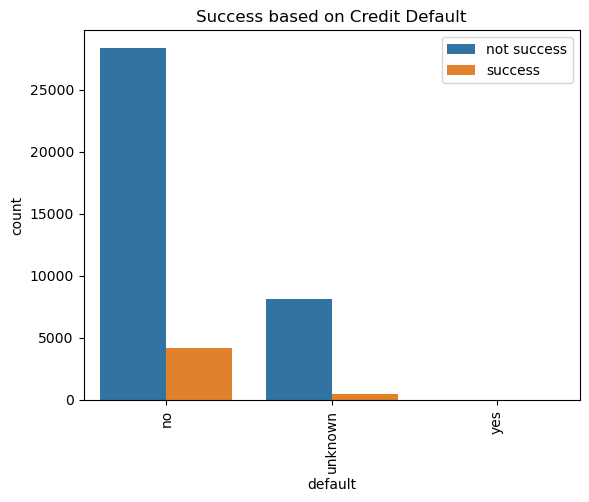

In [750]:
#Credit default on campaign success
ax = sns.countplot(data=df, x='default', hue='y')
ax.set_title('Success based on Credit Default')
plt.legend(labels=['not success', 'success'])
plt.xticks(rotation=90)
plt.savefig('images/success_credit.png', bbox_inches = "tight")

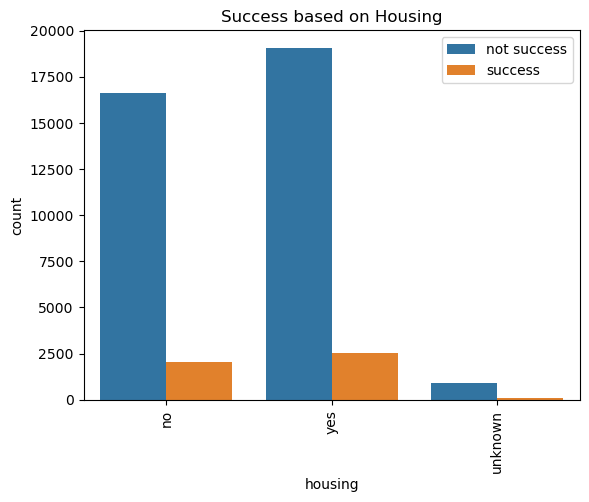

In [751]:
#Housing status on campaign success
ax = sns.countplot(data=df, x='housing', hue='y')
ax.set_title('Success based on Housing')
plt.legend(labels=['not success', 'success'])
plt.xticks(rotation=90)
plt.savefig('images/success_housing.png', bbox_inches = "tight")

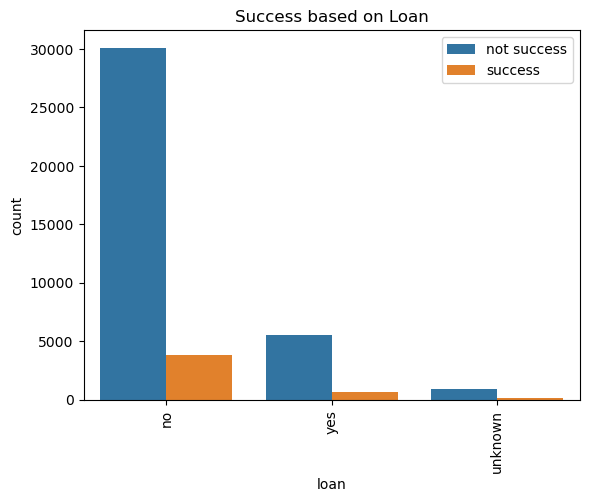

In [752]:
#Loan status on campaign success
ax = sns.countplot(data=df, x='loan', hue='y')
ax.set_title('Success based on Loan')
plt.legend(labels=['not success', 'success'])
plt.xticks(rotation=90)
plt.savefig('images/success_loan.png', bbox_inches = "tight")

### Problem 3: Response
- There is a total of 41188 entries in the dataset.
- None of the values are null.
- However, to run certain classifiers, such as LogisticRegression, we need to convert categorical values to numerical. For this purpose we will use OneHotEncoding.


### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

### Problem 4: Response - Business Objective
The data belongs to a bank's campaign to win deposit customers. Each attemp to win a customer either results in a successful or unsuccesful attempt.

The objective of this exercise is, using machine learning, coming up with model that tell us whether a customer would accept the deposit offer or not, prior to contacting the customer. This way, bank can target customers who are likely to take the deposit product in their campaign and bank resources can be much more effectively deployed.

Precision of the model is important, because we would like to deploy bank resources effectively.
Recall of the model is important as well, because we would like to capture most of the potential customers in our effort.

For those purposes we will focus on ROC AUC score.


### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features (columns 1 - 7), prepare the features and target column for modeling with appropriate encoding and transformations.

In [753]:
# Use job, marital, age features to build a model
# Apply OneHotEncoder to categorical data
# Apply StandardScaler to age

col_transformer = make_column_transformer((OneHotEncoder(drop='if_binary', sparse_output=False), ['job', 'marital', 'y']),
                                          (StandardScaler(), ['age']),
                                          remainder='passthrough')

col_transformer.set_output(transform='pandas')

data = full_data[['age', 'job', 'marital', 'y']]
data_transformed = col_transformer.fit_transform(data)    
data_transformed = data_transformed.rename(columns={'onehotencoder__y_yes':'y'})
data_transformed['y'] = data_transformed['y'].astype(int)
data_transformed


,onehotencoder__job_admin.,onehotencoder__job_blue-collar,onehotencoder__job_entrepreneur,onehotencoder__job_housemaid,onehotencoder__job_management,onehotencoder__job_retired,onehotencoder__job_self-employed,onehotencoder__job_services,onehotencoder__job_student,onehotencoder__job_technician,onehotencoder__job_unemployed,onehotencoder__job_unknown,onehotencoder__marital_divorced,onehotencoder__marital_married,onehotencoder__marital_single,onehotencoder__marital_unknown,y,standardscaler__age
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,1.533034
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,1.628993
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,-0.290186
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,-0.002309
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,1.533034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,3.164336
41184,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0.573445
41185,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,1.533034
41186,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1,0.381527


### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [754]:
X = data_transformed.drop('y', axis=1)
y = data_transformed['y']

#Use 30% for test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [755]:
#Use DummyClassifier as the baseline model

dc = DummyClassifier()
dc.fit(X_train, y_train)

accuracy = accuracy_score(y_test, dc.predict(X_test))
recall = recall_score(y_test, dc.predict(X_test))
precision = precision_score(y_test, dc.predict(X_test), zero_division=0)
roc_auc = roc_auc_score(y_test, dc.predict(X_test))

print(accuracy)
print(recall)
print(precision)
print(roc_auc)

0.8862183377842519
0.0
0.0
0.5


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [756]:
#LogisticRegression model as a simple one
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)



LogisticRegression(max_iter=1000)

### Problem 9: Score the Model

What is the accuracy of your model?

In [757]:
accuracy = accuracy_score(y_test, lr.predict(X_test))
recall = recall_score(y_test, lr.predict(X_test))
precision = precision_score(y_test, lr.predict(X_test), zero_division=0)
roc_auc = roc_auc_score(y_test, lr.predict(X_test))

print(accuracy)
print(recall)
print(precision)
print(roc_auc)

0.8862183377842519
0.0
0.0
0.5


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [775]:
def get_model_stats(models, X_train, X_test, y_train, y_test):
#get a dictionary of models
#fit each model
#compute roc auc score
#compute time it takes to fit
#return a dataframe that summarizes metrics

    result = pd.DataFrame(columns=['model', 'training_time (ms)', 'train_score', 'test_score'])
    
    for model_name, model in models.items():
        start = time.time()
        model.fit(X_train.values, y_train)
        end = time.time()

        training_time = (end - start)*1000


        train_score = roc_auc_score(y_train, model.predict(X_train.values))
        test_score = roc_auc_score(y_test, model.predict(X_test.values))

        result.loc[0] = [model_name, training_time, train_score, test_score]
        result.index = result.index + 1 
       
    result = result.sort_index()  
   
    return result

In [759]:
#Create each type of model
lr = LogisticRegression(max_iter=1000)
knn = KNeighborsClassifier()
dtc = DecisionTreeClassifier()
svc = SVC()

#Add them to a dict
models = {'LogisticRegression':lr,\
          'KNeighborsClassifier':knn,\
          'DecisionTreeClassifier':dtc,\
          'SVC':svc
}

#generate statistics
get_model_stats(models, X_train, X_test, y_train, y_test)

,model,training_time (ms),train_score,test_score
1,SVC,6564.337254,0.500734,0.500356
2,DecisionTreeClassifier,29.691458,0.525474,0.511319
3,KNeighborsClassifier,2.029657,0.539258,0.528778
4,LogisticRegression,49.068928,0.500000,0.500000


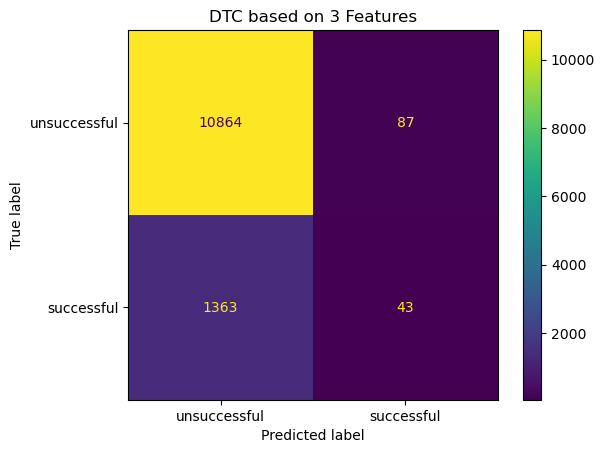

In [760]:
#confusion matrix for iteration 1
cm = ConfusionMatrixDisplay.from_predictions(y_test, dtc.predict(X_test.values), display_labels = ['unsuccessful', 'successful'])
cm.ax_.set_title('DTC based on 3 Features')
plt.savefig('images/confusion_dtc1.png', bbox_inches = "tight")

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [761]:
#Use all columns
col_transformer = make_column_transformer((OneHotEncoder(drop='if_binary', sparse_output=False), ['job', 'marital', 'education', 'default', 'housing', 'loan', 'y']),
                                          (StandardScaler(), ['age']),
                                          remainder='passthrough')

col_transformer.set_output(transform='pandas')

data = full_data[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'y']]
data_transformed = col_transformer.fit_transform(data)    
data_transformed = data_transformed.rename(columns={'onehotencoder__y_yes':'y'})
data_transformed['y'] = data_transformed['y'].astype(int)
data_transformed

X = data_transformed.drop('y', axis=1)
y = data_transformed['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)




In [762]:
#use SequentialFeatureSelector to select features
seq = SequentialFeatureSelector(Ridge())
seq.fit(X_train, y_train)
X_train.columns[seq.get_support()]

Index(['onehotencoder__job_admin.', 'onehotencoder__job_blue-collar',
       'onehotencoder__job_entrepreneur', 'onehotencoder__job_housemaid',
       'onehotencoder__job_retired', 'onehotencoder__job_student',
       'onehotencoder__job_unemployed', 'onehotencoder__marital_divorced',
       'onehotencoder__marital_single', 'onehotencoder__education_basic.9y',
       'onehotencoder__education_high.school',
       'onehotencoder__education_illiterate',
       'onehotencoder__education_university.degree',
       'onehotencoder__education_unknown', 'onehotencoder__default_no',
       'onehotencoder__default_yes', 'standardscaler__age'],
      dtype='object')

In [763]:
#Limit the training to the feeatures from Sequantial Feature Selection
X_train_seq = X_train[X_train.columns[seq.get_support()]]
X_test_seq = X_test[X_train.columns[seq.get_support()]]


In [764]:
#Repeat scores with sequential feature selection
get_model_stats(models, X_train_seq, X_test_seq, y_train, y_test)

,model,training_time (ms),train_score,test_score
1,SVC,11669.825077,0.503520,0.502017
2,DecisionTreeClassifier,33.498287,0.557236,0.521795
3,KNeighborsClassifier,2.003193,0.548852,0.521087
4,LogisticRegression,51.752567,0.500000,0.500000


In [765]:
#check correlation of variables to the target variable
data_transformed.corr()['y'].sort_values()

onehotencoder__default_unknown                 -0.099293
onehotencoder__job_blue-collar                 -0.074423
onehotencoder__education_basic.9y              -0.045135
onehotencoder__marital_married                 -0.043398
onehotencoder__job_services                    -0.032301
onehotencoder__education_basic.6y              -0.023517
onehotencoder__job_entrepreneur                -0.016644
onehotencoder__housing_no                      -0.011085
onehotencoder__education_basic.4y              -0.010798
onehotencoder__marital_divorced                -0.010608
onehotencoder__education_high.school           -0.007452
onehotencoder__job_housemaid                   -0.006505
onehotencoder__job_technician                  -0.006149
onehotencoder__job_self-employed               -0.004663
onehotencoder__loan_yes                        -0.004466
onehotencoder__default_yes                     -0.003041
onehotencoder__loan_unknown                    -0.002270
onehotencoder__housing_unknown 

In [766]:
#Repeat scores with all columns
get_model_stats(models, X_train, X_test, y_train, y_test)

,model,training_time (ms),train_score,test_score
1,SVC,20861.520529,0.503483,0.500940
2,DecisionTreeClassifier,79.521894,0.646111,0.524472
3,KNeighborsClassifier,5.003214,0.561278,0.517697
4,LogisticRegression,194.181681,0.500000,0.500000


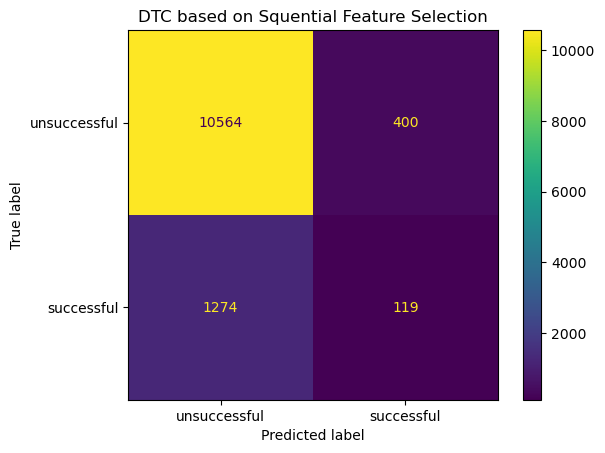

In [767]:
#confusion matrix for Iteration 2
cm = ConfusionMatrixDisplay.from_predictions(y_test, dtc.predict(X_test.values), display_labels = ['unsuccessful', 'successful'])
cm.ax_.set_title('DTC based on Squential Feature Selection')
plt.savefig('images/confusion_dtc2.png', bbox_inches = "tight")

In [776]:
#Grid parameters
lr_params = {'solver':['lbfgs', 'liblinear', 'newton-cg']}
knn_params = {'n_neighbors':[1,3,5,11,15,31,45,51,101,151,201,251,301]}
dtc_params = {'criterion':['gini', 'entropy', 'log_loss']}
svc_params = {'kernel':['linear', 'poly', 'rbf'], 'degree':[2,3]}

lr = LogisticRegression(max_iter=1000)
knn = KNeighborsClassifier()
dtc = DecisionTreeClassifier()
svc = SVC()

#create grid search for each estimator
lr_grid = GridSearchCV(estimator=lr, param_grid=lr_params, scoring='roc_auc', cv=5)
knn_grid = GridSearchCV(estimator=knn, param_grid=knn_params, scoring='roc_auc', cv=5)
dtc_grid = GridSearchCV(estimator=dtc, param_grid=dtc_params, scoring='roc_auc', cv=5)
svc_grid = GridSearchCV(estimator=svc, param_grid=svc_params, scoring='roc_auc', cv=5)

#turn grid search to dict
grids = {'LogisticRegression':lr_grid,\
          'KNeighborsClassifier':knn_grid,\
          'DecisionTreeClassifier':dtc_grid,\
          'SVC':svc_grid
}

#get stats
get_model_stats(grids, X_train, X_test, y_train, y_test)



,model,training_time (ms),train_score,test_score
1,SVC,272767.593145,0.503483,0.500940
2,DecisionTreeClassifier,980.312586,0.646111,0.523891
3,KNeighborsClassifier,14378.117085,0.499961,0.500313
4,LogisticRegression,1313.349247,0.500000,0.500000


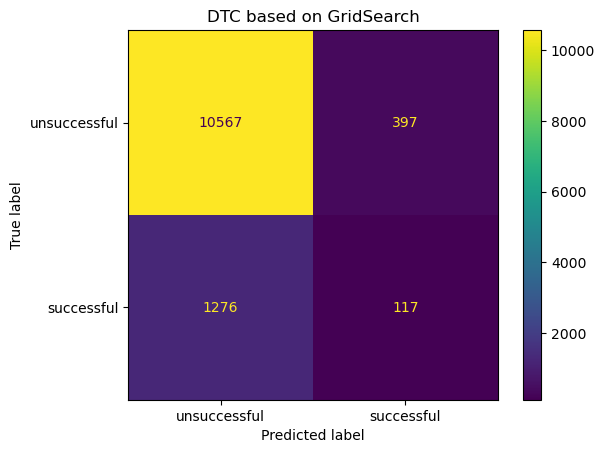

In [794]:
#confusion matrix for Iteration 3
cm = ConfusionMatrixDisplay.from_predictions(y_test, dtc_grid.predict(X_test.values), display_labels = ['unsuccessful', 'successful'])
cm.ax_.set_title('DTC based on GridSearch')
plt.savefig('images/confusion_dtc_grid.png', bbox_inches = "tight")

In [778]:
#Best k from KNN
best_k = list(knn_grid.best_params_.values())[0]
best_k

301

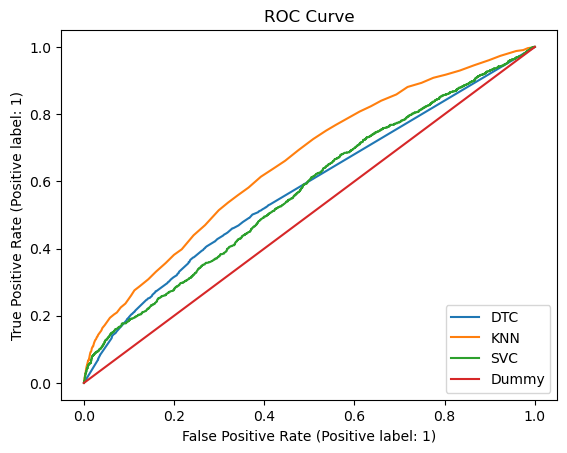

In [795]:
#ROC Curve comparison
fig, ax = plt.subplots()
RocCurveDisplay.from_estimator(dtc_grid, X_test.values, y_test, pos_label=1, ax=ax, label = 'DTC')
RocCurveDisplay.from_estimator(knn_grid, X_test.values, y_test, pos_label=1, ax=ax, label = 'KNN')
RocCurveDisplay.from_estimator(svc_grid, X_test.values, y_test, pos_label=1, ax=ax, label = 'SVC')
RocCurveDisplay.from_estimator(DummyClassifier().fit(X_train, y_train), X_test.values, y_test, pos_label=1, ax=ax, label = 'Dummy')
plt.title('ROC Curve')
plt.savefig('images/roc_curve.png', bbox_inches = "tight")